['mery', 'ningen_mame', 'torino', 'yukien']


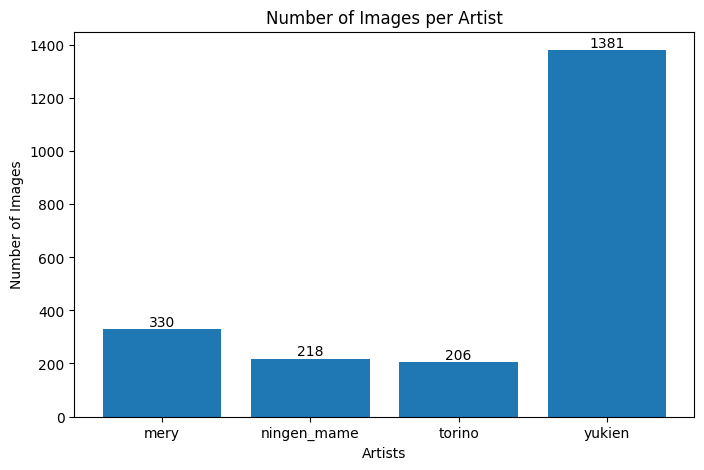

In [8]:
import os
import matplotlib.pyplot as plt

# Path to dataset
dataset_path = "dataset"

# Get folder names
artist_folders = sorted([folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))])

print(os.listdir(dataset_path))

# Count images per artist
image_counts = [len(os.listdir(os.path.join(dataset_path, folder))) for folder in artist_folders]

# Rename x-axis labels
artist_names = [os.listdir(dataset_path)[i] for i in range(len(artist_folders))]  # Convert indices to names

# Plot bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(artist_names, image_counts)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')


plt.xlabel("Artists")
plt.ylabel("Number of Images")
plt.title("Number of Images per Artist")
# plt.xticks(rotation=15)
plt.show()


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and process
df = pd.read_csv('dataset.csv')
df_numeric = df.drop(columns=['image_path'])
summary = df_numeric.groupby('artist_label').agg(['mean', 'std'])

# Flatten MultiIndex columns
summary.columns = [f"{col}_{stat}" for col, stat in summary.columns]

# Round values for better readability
summary = summary.round(3)

# Display
from tabulate import tabulate

print(tabulate(summary, headers='keys', tablefmt='psql', floatfmt=".3f"))


+----------------+---------------------+--------------------+---------------------------+--------------------------+------------------------+-----------------------+------------------------+-----------------------+---------------------+--------------------+----------------------+---------------------+------------------+-----------------+--------------------+-------------------+------------------+-----------------+--------------------+-------------------+--------------+-------------+--------------+-------------+--------------+-------------+--------------+-------------+--------------+-------------+--------------+-------------+--------------+-------------+--------------+-------------+--------------+-------------+--------------+-------------+
|   artist_label |   edge_density_mean |   edge_density_std |   laplacian_variance_mean |   laplacian_variance_std |   shannon_entropy_mean |   shannon_entropy_std |   hs_colorfulness_mean |   hs_colorfulness_std |   color_spread_mean |   color_spread

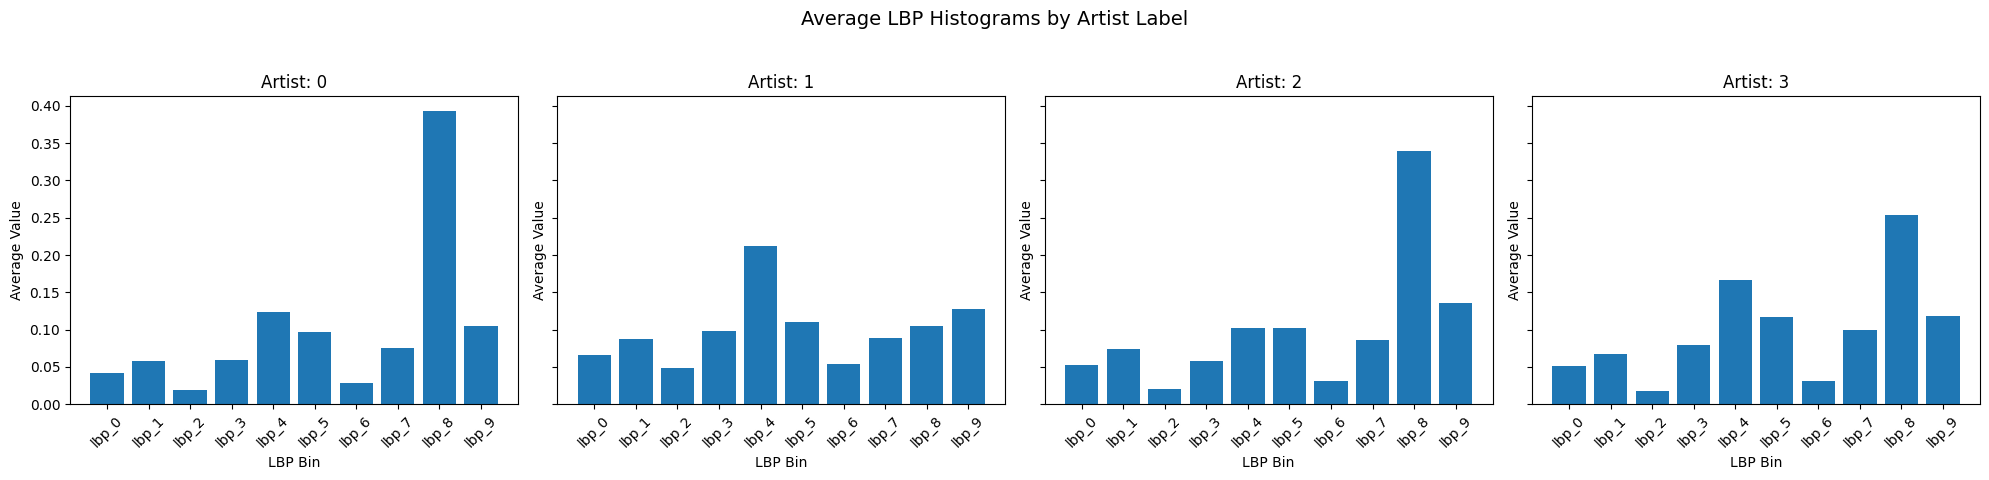

In [18]:
# Extract LBP columns
lbp_columns = [col for col in df.columns if col.startswith('lbp_')]
df_lbp = df[['artist_label'] + lbp_columns]

# Group by artist label and compute mean
mean_lbps = df_lbp.groupby('artist_label').mean()

num_artists = len(mean_lbps)

max_plots_per_row = 4
nrows = (num_artists + max_plots_per_row - 1) // max_plots_per_row
ncols = min(num_artists, max_plots_per_row)

# Plot bar charts
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, 
                        figsize=(5*ncols, 5*nrows), 
                        sharey=True, 
                        squeeze=False)

axes_flat = axes.flatten()

for idx, (label, row) in enumerate(mean_lbps.iterrows()):
    if idx >= len(axes_flat):  # Safety check in case we have more artists than subplots
        break
    ax = axes_flat[idx]
    ax.bar(lbp_columns, row.values)
    ax.set_title(f'Artist: {label}')
    ax.set_xlabel('LBP Bin')
    ax.set_ylabel('Average Value')
    ax.tick_params(axis='x', rotation=45)

# Hide any unused subplots
for ax in axes_flat[num_artists:]:
    ax.set_visible(False)

plt.suptitle('Average LBP Histograms by Artist Label', fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


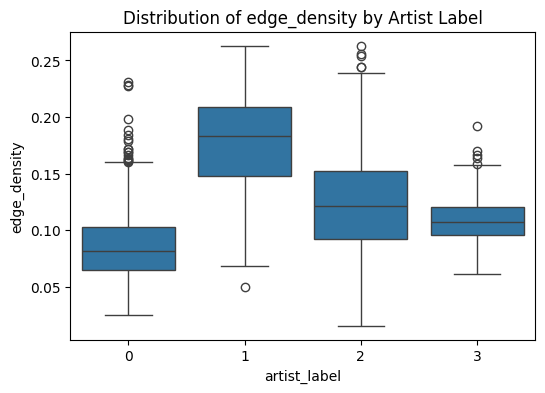

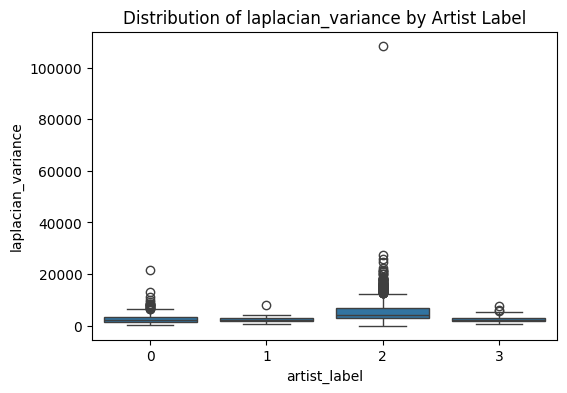

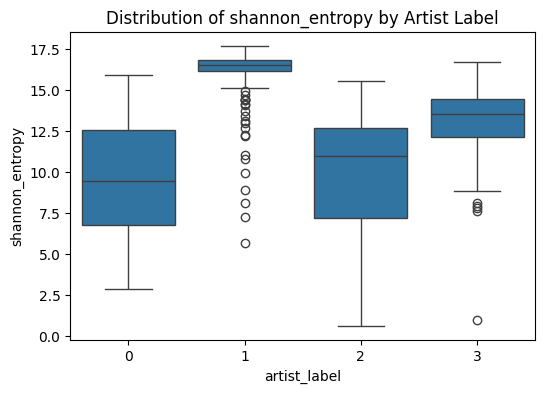

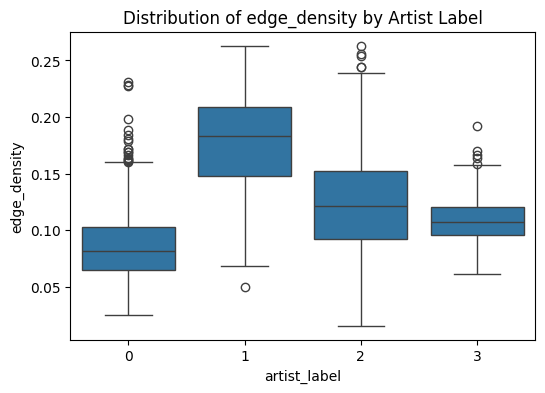

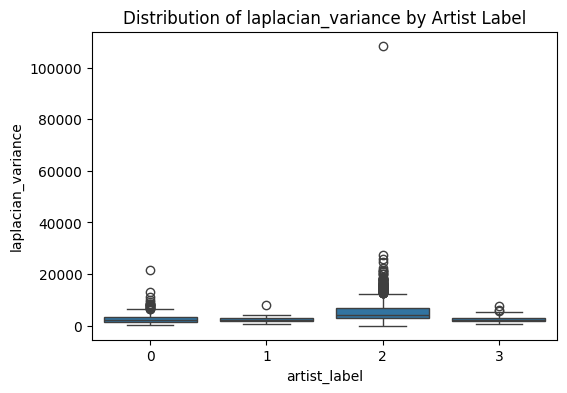

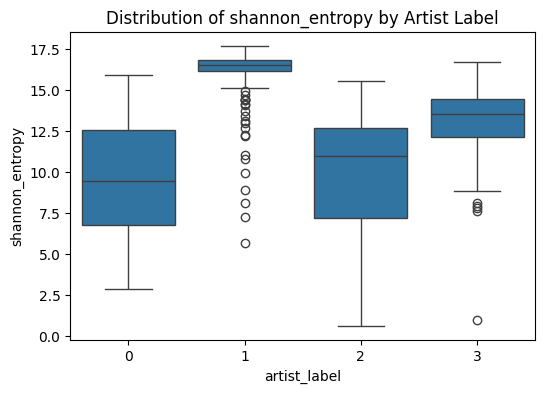

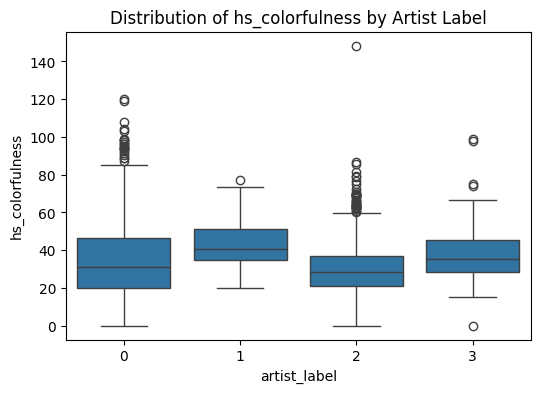

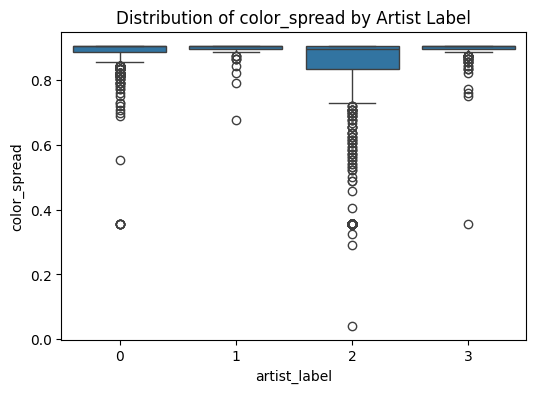

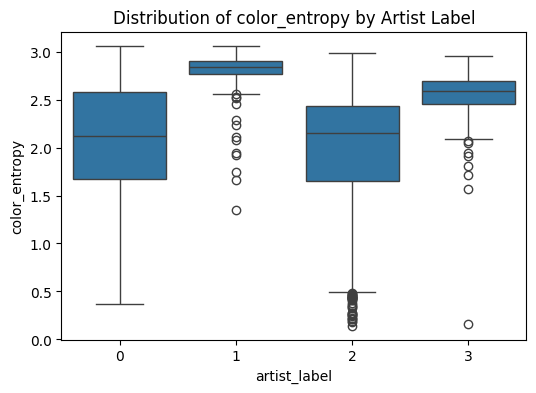

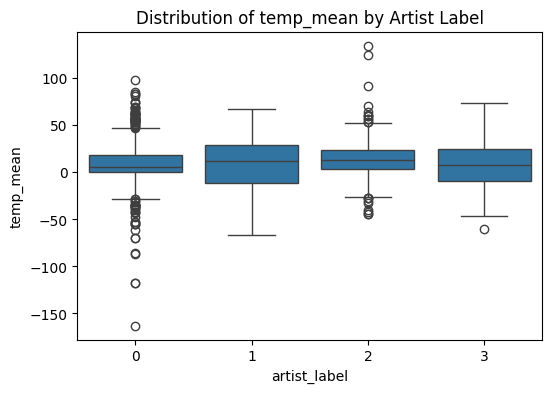

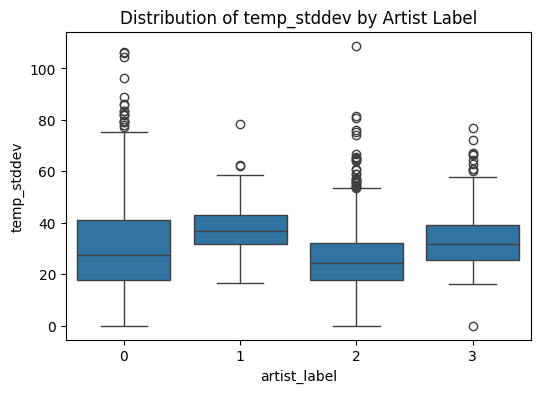

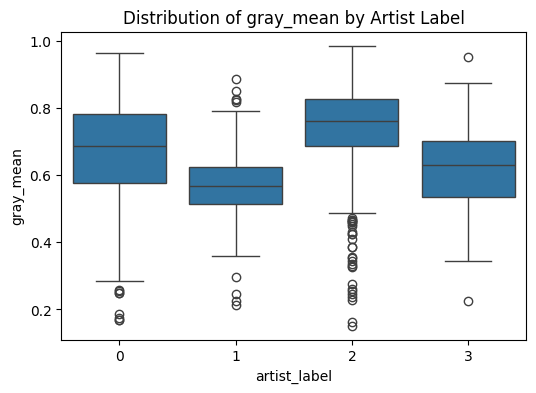

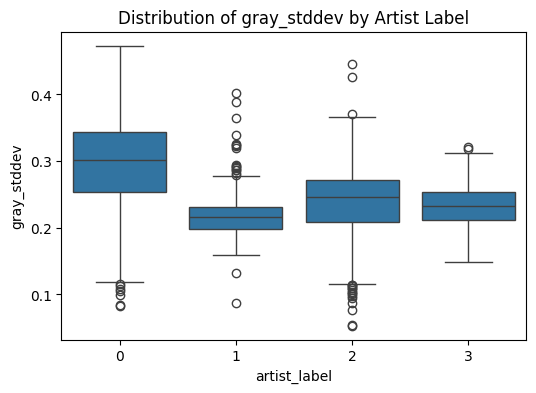

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# laplacian_variance outlier: dataset/yukien\danbooru_4440329_9d164b04d60e5ee4344611ec7ee0e950.png
features = ['edge_density', 'laplacian_variance', 'shannon_entropy', 'edge_density', 'laplacian_variance', 'shannon_entropy', 
            'hs_colorfulness', 'color_spread', 'color_entropy', 'temp_mean', 'temp_stddev', 'gray_mean', 'gray_stddev']

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='artist_label', y=feature, data=df)
    plt.title(f'Distribution of {feature} by Artist Label')
    plt.show()


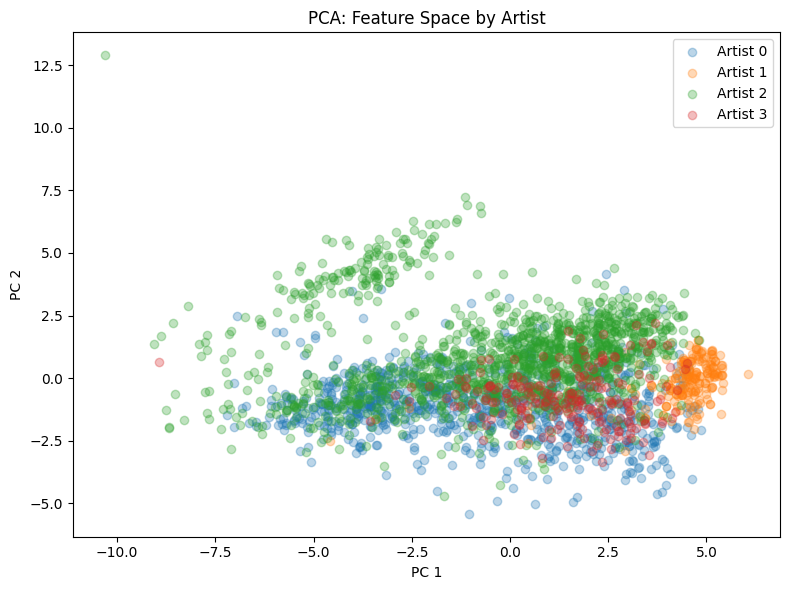

In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features = df.drop(columns=['image_path', 'artist_label'])
labels = df['artist_label']

# Normalize
X_scaled = StandardScaler().fit_transform(features)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot
plt.figure(figsize=(8, 6))
for label in sorted(labels.unique()):
    idx = labels == label
    plt.scatter(X_pca[idx, 0], X_pca[idx, 1], label=f'Artist {label}', alpha=0.3)

plt.title('PCA: Feature Space by Artist')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.tight_layout()
plt.show()


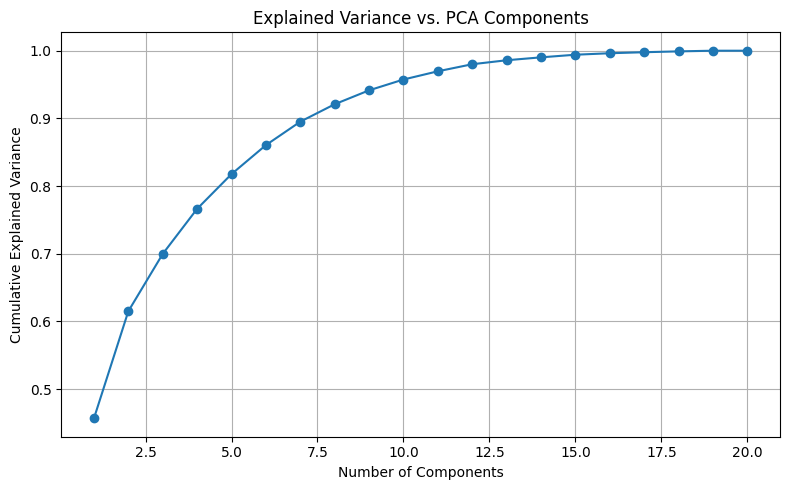

In [23]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

# Load and prepare data
df = pd.read_csv('dataset.csv')
X = df.drop(columns=['image_path', 'artist_label'])

# Standardize features
X_scaled = StandardScaler().fit_transform(X)

# Fit PCA without limiting components
pca = PCA()
pca.fit(X_scaled)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. PCA Components')
plt.grid(True)
plt.tight_layout()
plt.show()
